In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fertilizer Prediction.csv to Fertilizer Prediction.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Fertilizer Prediction.csv']))

In [ ]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
df.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [ ]:
df.size

891

In [ ]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [ ]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [ ]:
df['Soil Type'].value_counts()

Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64

In [ ]:
df['Crop Type'].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: Crop Type, dtype: int64

In [ ]:
s = df.corr()
print(s)

             Temparature  Humidity   Moisture  Nitrogen  Potassium  \
Temparature     1.000000   0.973164  0.091222 -0.033771  -0.023424   
Humidity        0.973164   1.000000  0.091342 -0.060646  -0.003833   
Moisture        0.091222   0.091342  1.000000 -0.095945   0.027727   
Nitrogen       -0.033771  -0.060646 -0.095945  1.000000  -0.500087   
Potassium      -0.023424  -0.003833  0.027727 -0.500087   1.000000   
Phosphorous     0.207545   0.204044  0.009276 -0.686971   0.089192   

             Phosphorous  
Temparature     0.207545  
Humidity        0.204044  
Moisture        0.009276  
Nitrogen       -0.686971  
Potassium       0.089192  
Phosphorous     1.000000  


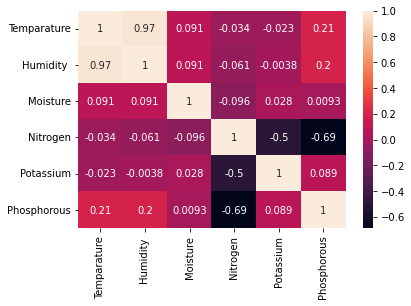

In [ ]:
sns.heatmap(s,annot = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Soil Type'] = le.fit_transform(df['Soil Type'])
df['Crop Type'] = le.fit_transform(df['Crop Type'])

In [ ]:
print(df['Soil Type'])
print(df['Crop Type'])

0     4
1     2
2     0
3     3
4     1
     ..
94    1
95    3
96    2
97    4
98    0
Name: Soil Type, Length: 99, dtype: int64
0      3
1      8
2      1
3      9
4      6
      ..
94     7
95     9
96    10
97     4
98     8
Name: Crop Type, Length: 99, dtype: int64


In [ ]:
features = df[['Temparature','Humidity ','Moisture','Soil Type','Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']]
target = df['Fertilizer Name']

In [ ]:
acc = []
model = []

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size= 0.2,random_state = 2)

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

predicted = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression Accuracy is",x * 100)
print(classification_report(y_test,predicted))

Logistic Regression Accuracy is 100.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         2
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
SVM = SVC(gamma = 'auto')
SVM.fit(X_train,y_train)

predicted = SVM.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('SVM')
print('SVM accuracy score is',x * 100)
print(classification_report(y_test,predicted))

SVM accuracy score is 40.0
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         3
    14-35-14       0.00      0.00      0.00         2
    17-17-17       0.00      0.00      0.00         1
       20-20       0.00      0.00      0.00         4
       28-28       1.00      0.33      0.50         3
         DAP       1.00      1.00      1.00         2
        Urea       0.29      1.00      0.45         5

    accuracy                           0.40        20
   macro avg       0.33      0.33      0.28        20
weighted avg       0.32      0.40      0.29        20



DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,random_state = 2)
DecisionTree.fit(X_train,y_train)
predicted = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's accuracy is", x * 100)

print(classification_report(y_test,predicted))

Decision Tree's accuracy is 85.0
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         3
    14-35-14       0.40      1.00      0.57         2
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         5

    accuracy                           0.85        20
   macro avg       0.77      0.86      0.80        20
weighted avg       0.79      0.85      0.81        20



GAUSSIAN NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train,y_train)

predicted = Naive_Bayes.predict(X_test)
X = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Naive Bayes')
print('Naive Bayes accuracy is',x * 100)

print(classification_report(y_test,predicted))

Naive Bayes accuracy is 85.0
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         3
    14-35-14       1.00      1.00      1.00         2
    17-17-17       0.25      1.00      0.40         1
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         5

    accuracy                           0.85        20
   macro avg       0.75      0.86      0.77        20
weighted avg       0.81      0.85      0.82        20

